In [1]:
# importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [27]:
#loading dataset
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [28]:
data.shape

(200, 5)

In [29]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Data cleaning and checking null values

In [30]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

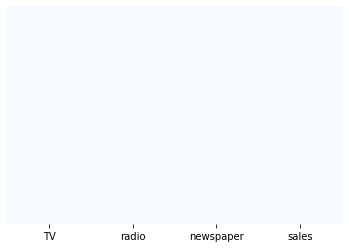

In [37]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )

## there is no null value present in this dataset

In [32]:
data.rename(columns={'Unnamed: 0': 'Unnamed'},inplace=True)

In [33]:
data.drop(columns=['Unnamed'], inplace=True)


In [34]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data visualization

##  Outlier Analysis

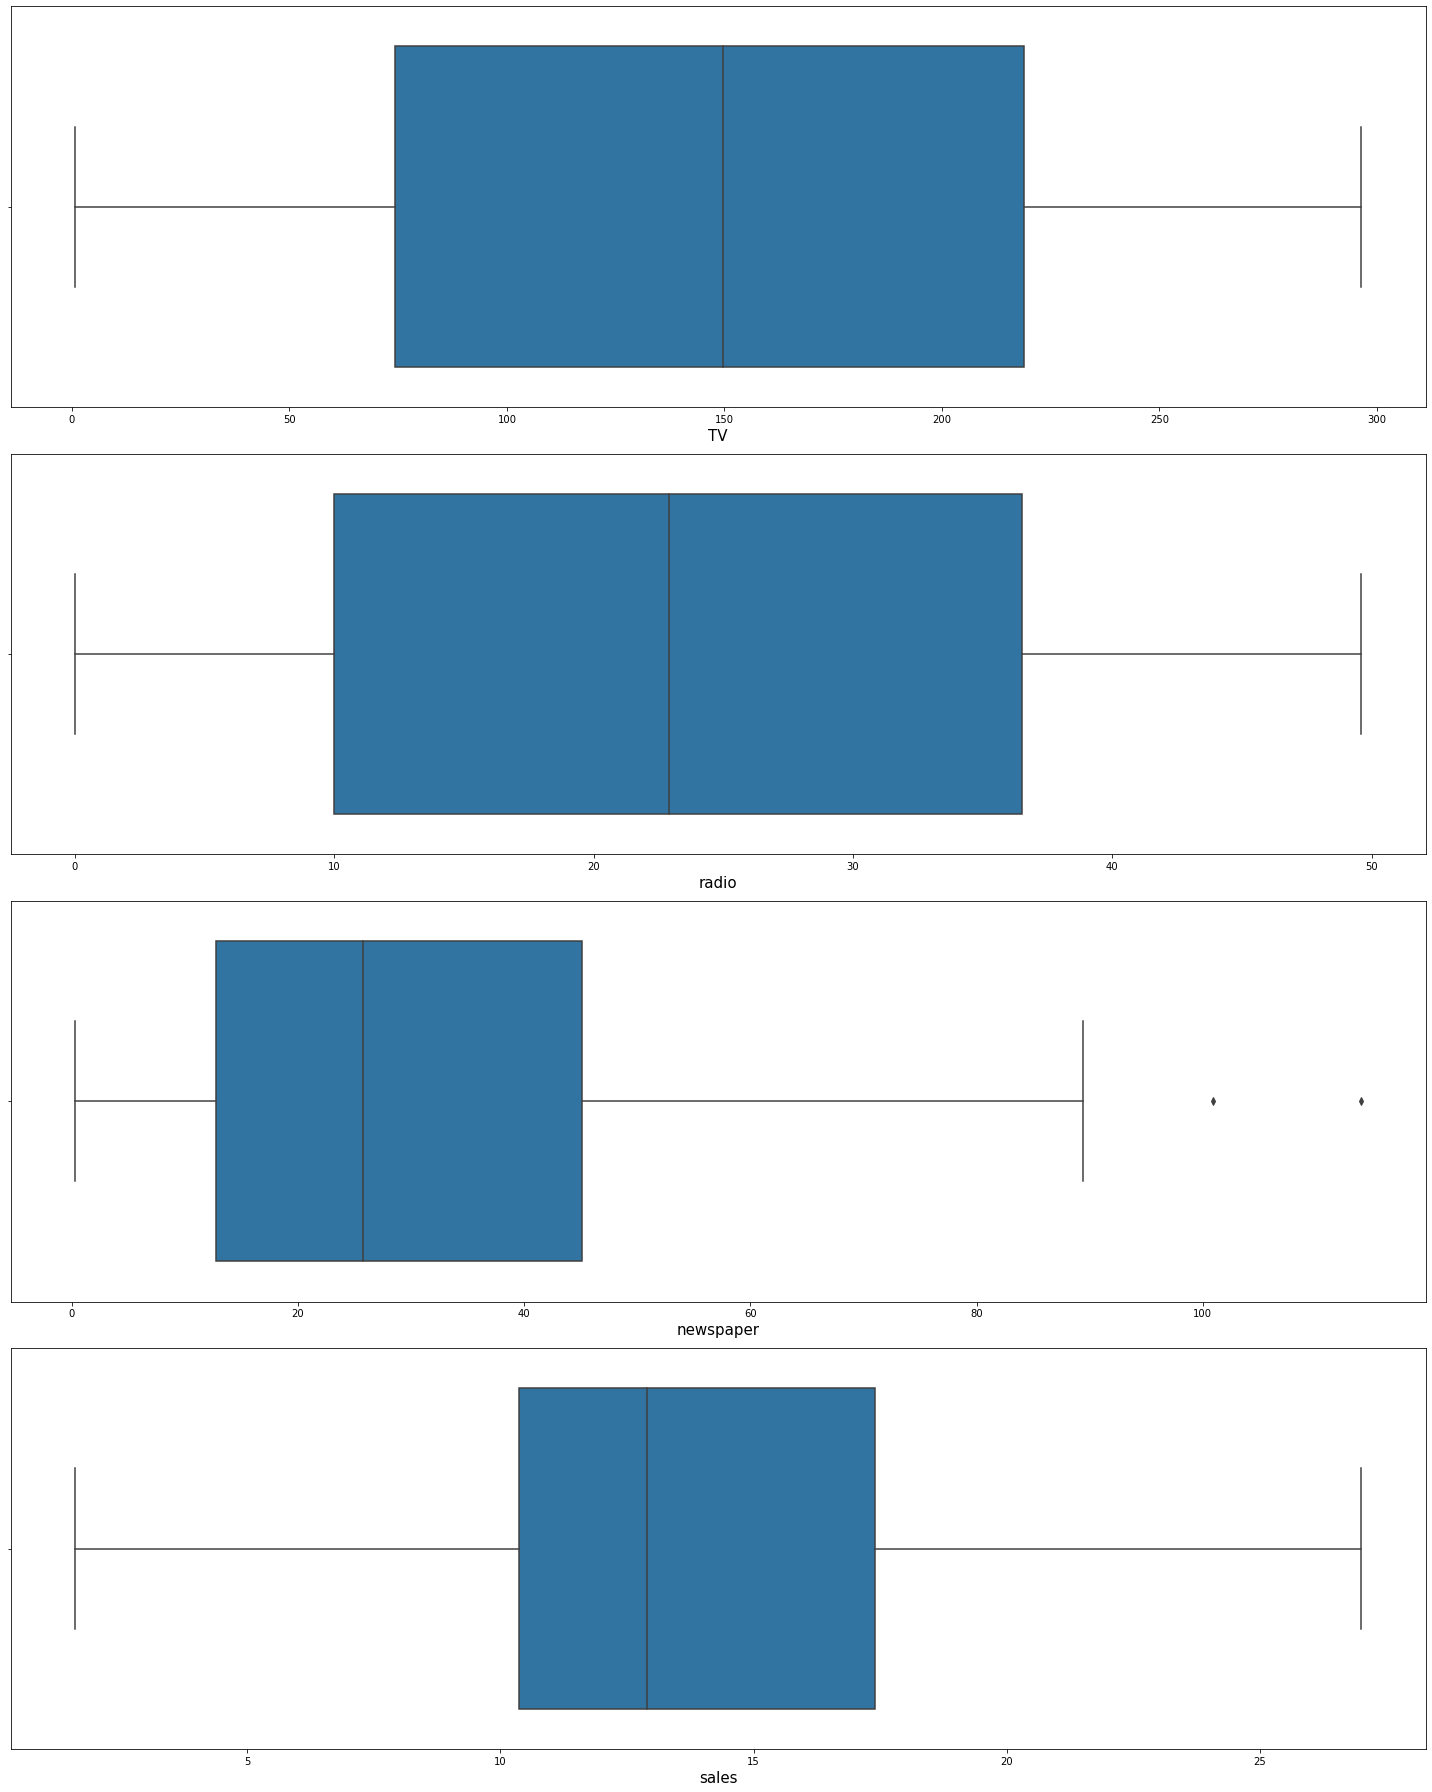

In [38]:
plt.figure(figsize=(20,25))
plotnumber=1


for column in data:
    if plotnumber<=4:
        plt.subplot(4,1,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

# EDA

# sales(Target)

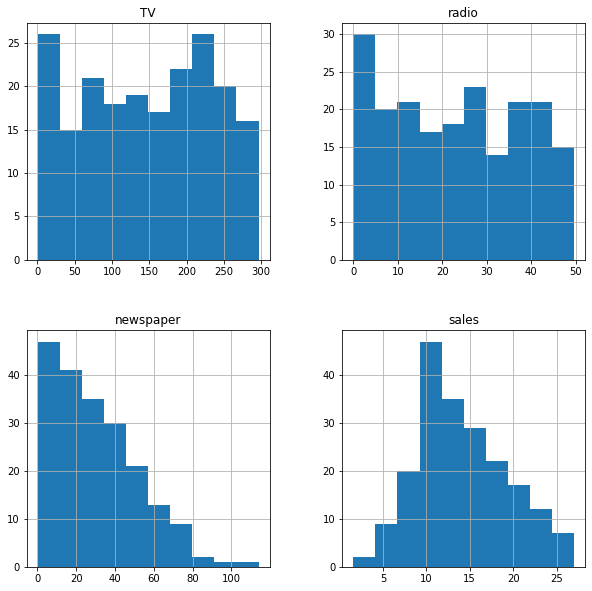

In [40]:
data.hist( bins = 10, figsize = (10,10))
plt.show()

### Spending budget for advertisments on TV is in all range, same for Radio but less than TV. But on newspapers, lowest budget is spend

## skewness

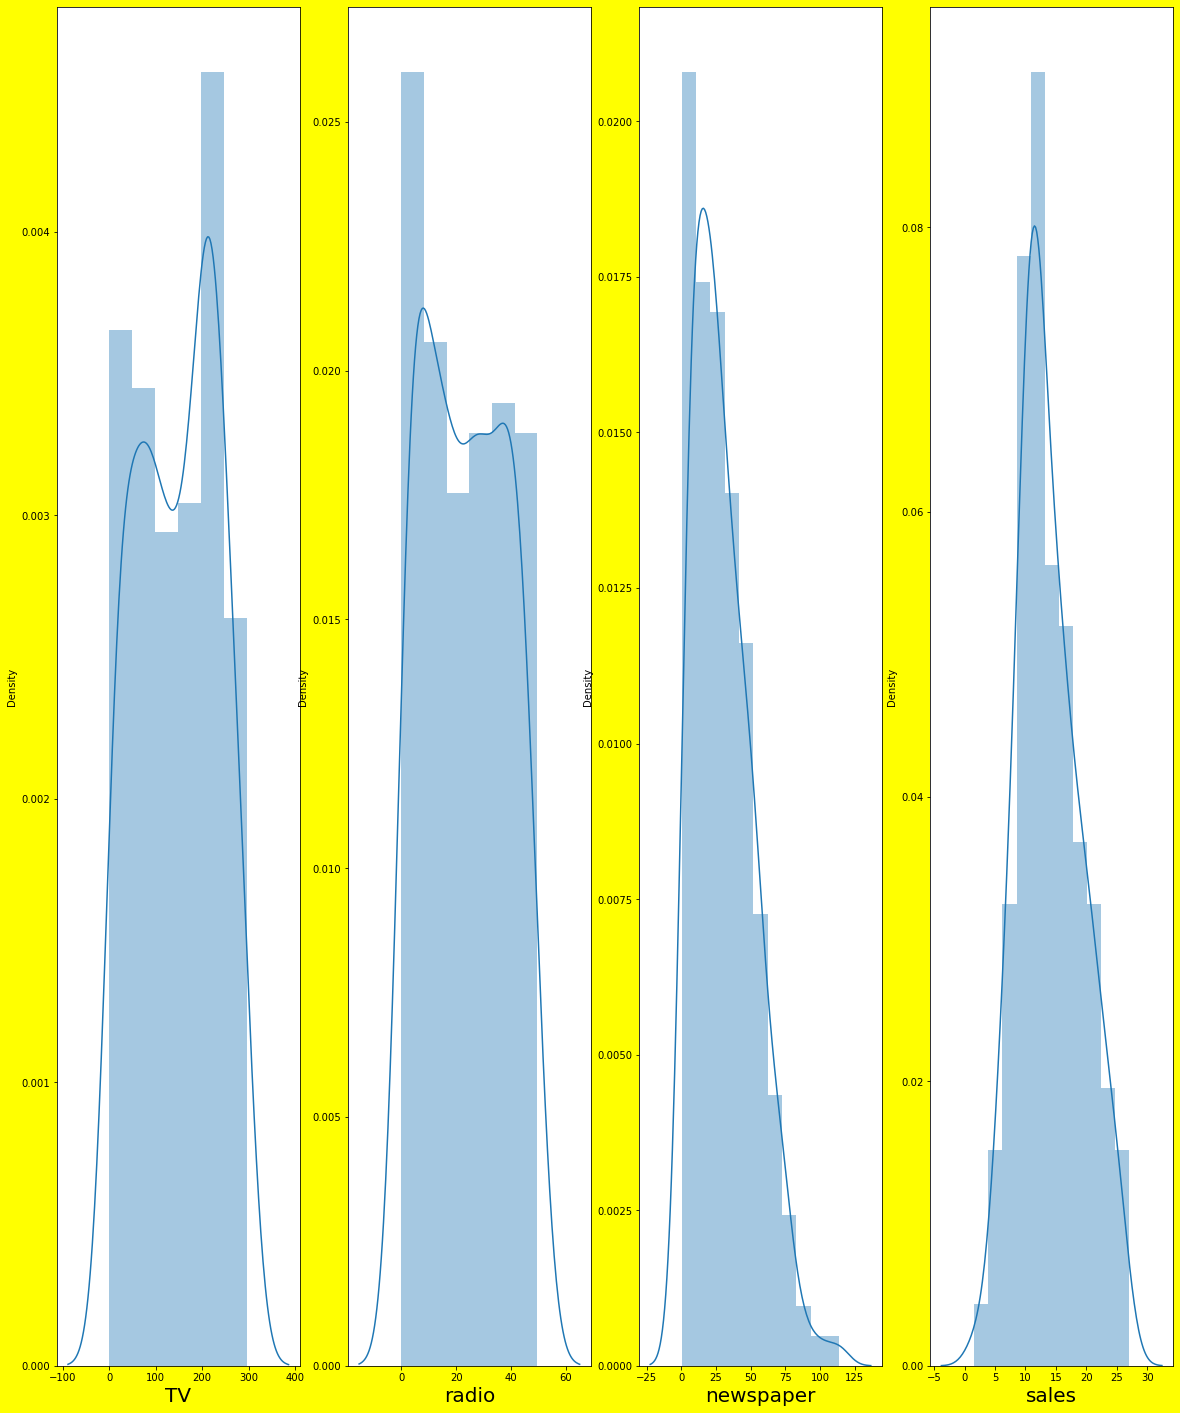

In [51]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber <=4:
        ax = plt.subplot(1,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

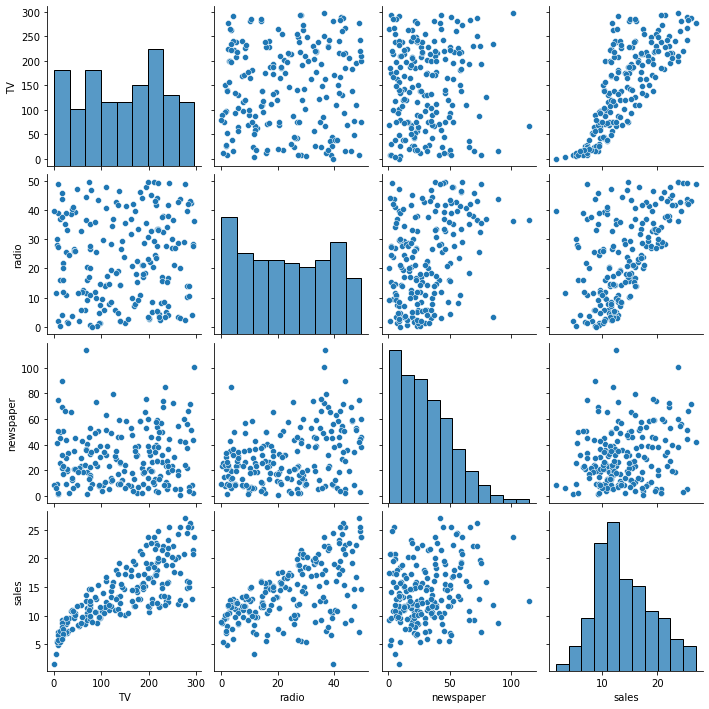

In [43]:
sns.pairplot(data, size=2.5)
plt.show()

### Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.There is no correlation seems between all features.

# Checking Multicollinearity

<AxesSubplot:>

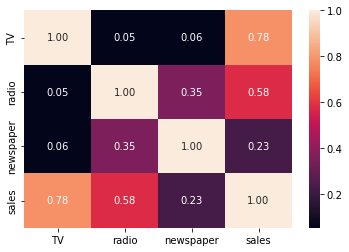

In [44]:
# Calculate correlations
corr = data.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

# Separate feature variables and target variable

In [45]:
X = data.drop(['sales'], axis = 1)
Y= data['sales']


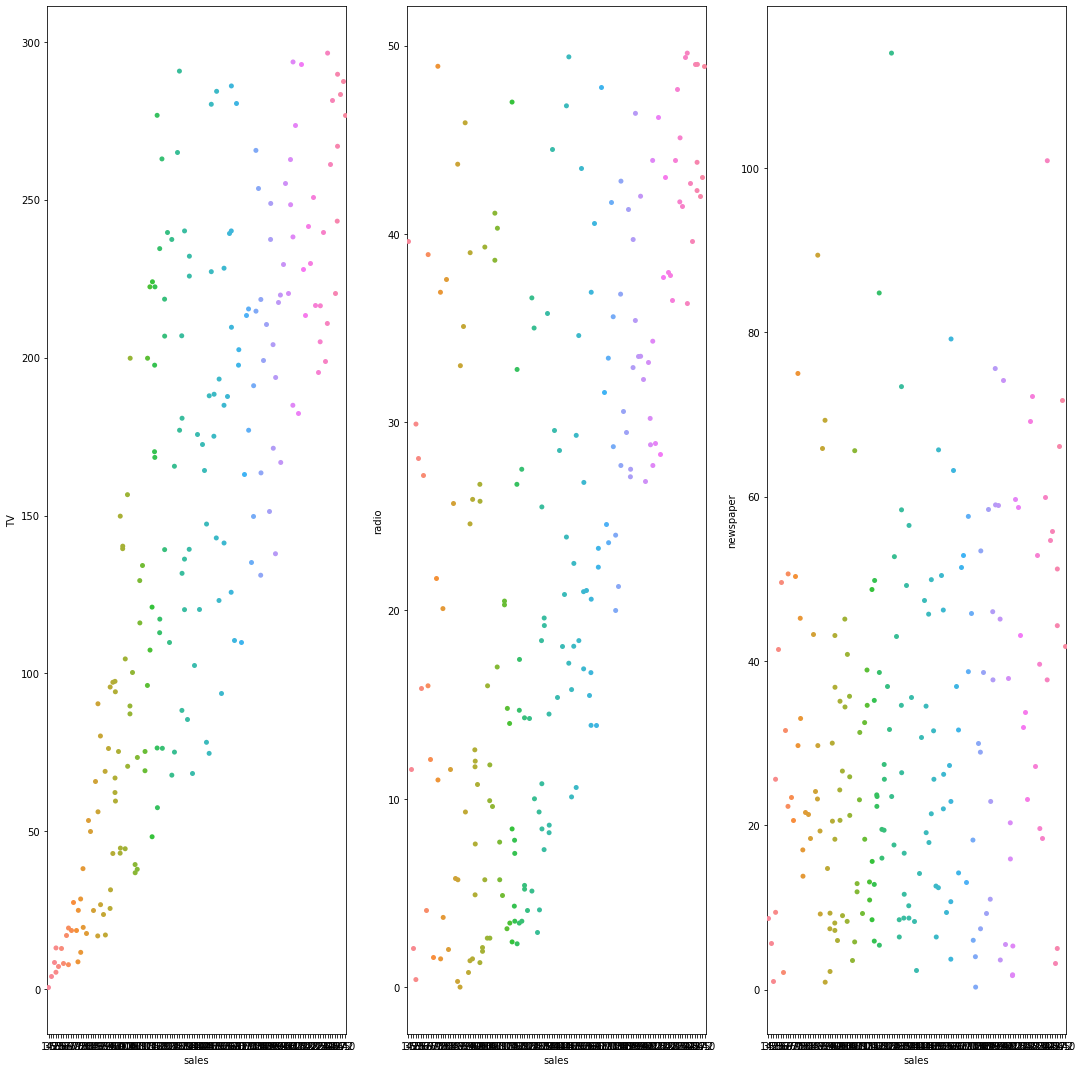

In [48]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in X :
    if plotnumber<=3:
        ax=plt.subplot(1,4,plotnumber)
        sns.stripplot(Y,X[column])
        
    plotnumber+=1
plt.tight_layout()

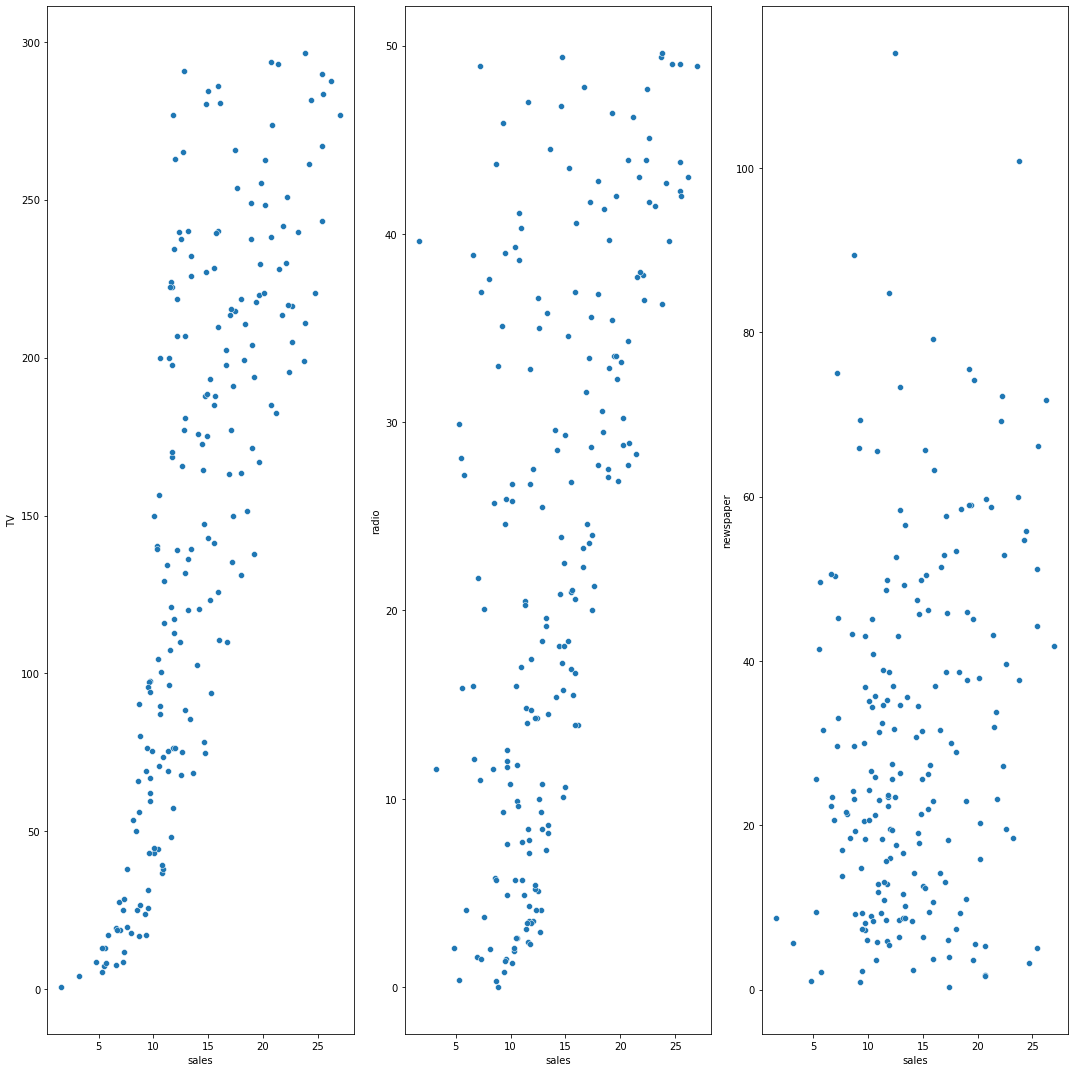

In [49]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in X :
    if plotnumber<=3:
        ax=plt.subplot(1,4,plotnumber)
        sns.scatterplot(Y,X[column])
        
    plotnumber+=1
plt.tight_layout()

# checking multicollinearity between features

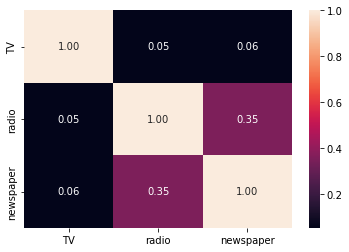

In [52]:
sns.heatmap(X.corr(), annot=True, fmt=".2f")
plt.show()

### Splitting Dataset

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y , test_size = 0.25, random_state = 0)

# Standarization of features 

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## models

## LinearRegression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr_regressor = LinearRegression() 
lr_regressor.fit(X_train, Y_train) 

# after training the data, perform prediction:

y_pred_lr = lr_regressor.predict(X_test) # this is the prediction 


print('r2_score :',r2_score(Y_test, y_pred_lr))
print('MAE :',mean_absolute_error(Y_test, y_pred_lr))
print('MSE :',mean_squared_error(Y_test, y_pred_lr))
print('RMSE :',np.sqrt(mean_absolute_error(Y_test, y_pred_lr)))

print('/n', '-' *200)

print('Training score :',lr_regressor.score(X_train,Y_train))
print('testing score:', lr_regressor.score(X_test,Y_test))



r2_score : 0.8576396745320892
MAE : 1.3000320919235457
MSE : 4.012497522917102
RMSE : 1.1401894982517362
/n --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Training score : 0.9072183330817297
testing score: 0.8576396745320892


In [61]:
print(lr_regressor.coef_, lr_regressor.intercept_)

[3.72650688 2.94496827 0.02370631] 14.351333333333333


## Cross validation score

In [63]:
from sklearn. model_selection import cross_val_score
cross_val_score(lr_regressor,X,Y,cv=5).mean()

0.8871063495438436

## Random Forest Regression

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor() 
rf_regressor.fit(X_train, Y_train) 

y_pred_rf = rf_regressor.predict(X_test) 

print('r2_score :',r2_score(Y_test, y_pred_rf))
print('MAE :',mean_absolute_error(Y_test, y_pred_rf))
print('MSE :',mean_squared_error(Y_test, y_pred_rf))
print('RMSE :',np.sqrt(mean_absolute_error(Y_test, y_pred_rf)))

print('/n', '-' *100)

print('Training score :',lr_regressor.score(X_train,Y_train))
print('testing score:', lr_regressor.score(X_test,Y_test))

r2_score : 0.966499815649917
MAE : 0.6940200000000003
MSE : 0.9442195799999996
RMSE : 0.8330786277417038
/n ----------------------------------------------------------------------------------------------------
Training score : 0.9072183330817297
testing score: 0.8576396745320892


In [65]:
cross_val_score(rf_regressor,X,Y,cv=5).mean()

0.9748404528494673

# Decision Tree Regression

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, Y_train)

y_pred_dt = dt_regressor.predict(X_test)

print('r2_score :',r2_score(Y_test, y_pred_dt))
print('MAE :',mean_absolute_error(Y_test, y_pred_dt))
print('MSE :',mean_squared_error(Y_test, y_pred_dt))
print('RMSE :',np.sqrt(mean_absolute_error(Y_test, y_pred_dt)))

print('/n', '-' *120)

print('Training score :',lr_regressor.score(X_train,Y_train))
print('testing score:', lr_regressor.score(X_test,Y_test))

r2_score : 0.9190576829848421
MAE : 1.006
MSE : 2.281399999999999
RMSE : 1.0029955134495867
/n ------------------------------------------------------------------------------------------------------------------------
Training score : 0.9072183330817297
testing score: 0.8576396745320892


In [69]:
cross_val_score(dt_regressor,X,Y,cv=5).mean()

0.9540902732075643

In [70]:
from sklearn.linear_model import Ridge
ridge = Ridge() 
ridge.fit(X_train, Y_train) 

y_pred_r = ridge.predict(X_test) 

print('r2_score :',r2_score(Y_test, y_pred_r))
print('MAE :',mean_absolute_error(Y_test, y_pred_r))
print('MSE :',mean_squared_error(Y_test, y_pred_r))
print('RMSE :',np.sqrt(mean_absolute_error(Y_test, y_pred_r)))

print('/n', '-' *100)

print('Training score :',ridge.score(X_train,Y_train))
print('testing score:', ridge.score(X_test,Y_test))

r2_score : 0.857381432405657
MAE : 1.2972206614139343
MSE : 4.019776207404625
RMSE : 1.1389559523589727
/n ----------------------------------------------------------------------------------------------------
Training score : 0.9071795557923524
testing score: 0.857381432405657


In [71]:
cross_val_score(ridge,X,Y,cv=5).mean()

0.8871067777046353

# PolynomialFeatures

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
po_regressor = LinearRegression()


po_regressor.fit(poly.fit_transform(X_train), Y_train)



y_pred_po = po_regressor.predict(poly.fit_transform(X_test))

print('r2_score :',r2_score(Y_test, y_pred_po))
print('MAE :',mean_absolute_error(Y_test, y_pred_po))
print('MSE :',mean_squared_error(Y_test, y_pred_po))
print('RMSE :',np.sqrt(mean_absolute_error(Y_test, y_pred_po)))

print('/n', '-' *100)



r2_score : 0.9719735711900076
MAE : 0.5287370141587173
MSE : 0.7899390213297566
RMSE : 0.7271430493092245
/n ----------------------------------------------------------------------------------------------------


In [80]:
cross_val_score(po_regressor ,X,Y,cv=5).mean()

0.8871063495438436

## I have choosen "DecisionTreeRegressor" because it has very less difference b/w accuracy score and cross validation score

In [81]:
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(Y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     475.9
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           3.89e-75
Time:                        22:14:02   Log-Likelihood:                -279.71
No. Observations:                 150   AIC:                             567.4
Df Residuals:                     146   BIC:                             579.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3513      0.129    111.038      0.0